Matthew Virgin <br>
ECE 491 <br>
Final Project <br>
15 December 2023 <br>

Assuming you have already extracted the archive into the same folder as this 
notebook, let's explore the training and testing sets

In [14]:
import os

# Base directories
curr_dir = os.getcwd()
train_folder = os.path.join(curr_dir, "Training")
test_folder = os.path.join(curr_dir, "Testing")

tumor_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
train_dirs = []

# function that takes a parent folder name and a list of its child folder names and
# returns a list containing the proper directory names
def nameFolders(parent_name, child_name_list):
    dirs = []
    for name in child_name_list:
        full_path = os.path.join(parent_name, name)
        dirs.append(full_path)
    return dirs

# list of each train directory
train_dirs = nameFolders(train_folder, tumor_names)

# list of each test directory
test_dirs = nameFolders(test_folder, tumor_names)

In [15]:
# function to print the length of each directory
def print_directory_lengths(directory, name):
    files = os.listdir(directory)
    print(f"{name} directory ({directory}): {len(files)} files")

# print the length of each training directory
for i in range(len(train_dirs)):
    print_directory_lengths(train_dirs[i], "train " + tumor_names[i])

# print the length of each test directory
for i in range(len(test_dirs)):
    print_directory_lengths(test_dirs[i], "test " + tumor_names[i])

train glioma_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Training\glioma_tumor): 826 files
train meningioma_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Training\meningioma_tumor): 822 files
train no_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Training\no_tumor): 395 files
train pituitary_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Training\pituitary_tumor): 827 files
test glioma_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Testing\glioma_tumor): 100 files
test meningioma_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Testing\meningioma_tumor): 115 files
test no_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Testing\no_tumor): 105 files
test pituitary_tumor directory (c:\Users\Matt\Desktop\School\ECE-491\Testing\pituitary_tumor): 74 files


train samples


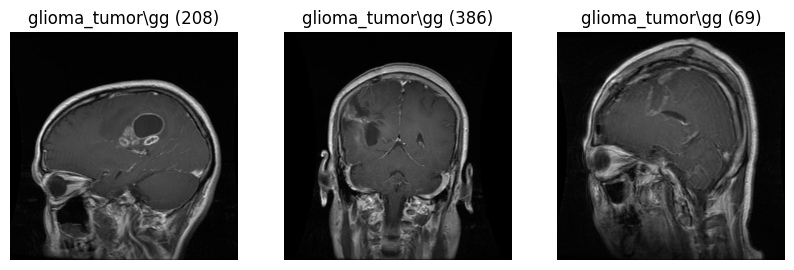

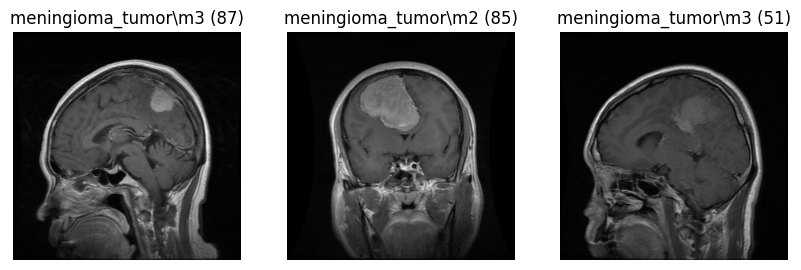

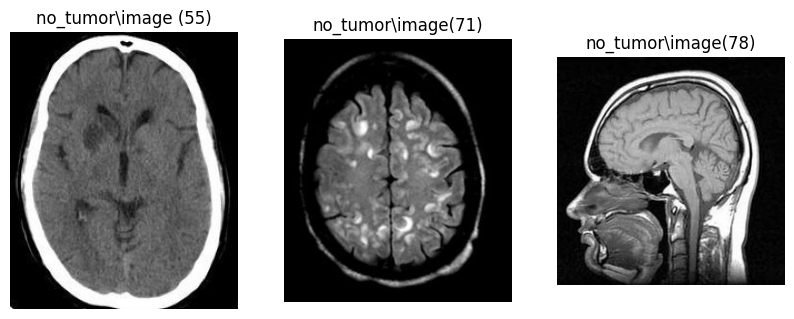

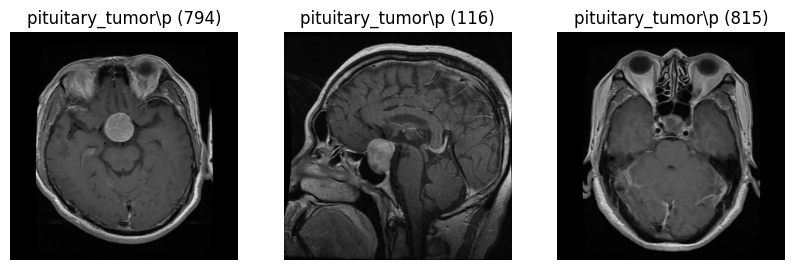

test samples


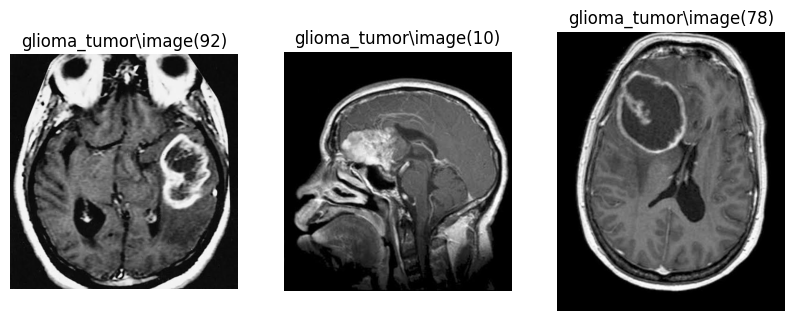

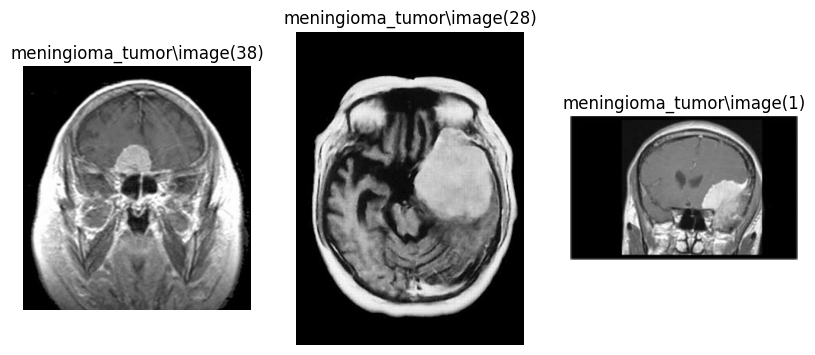

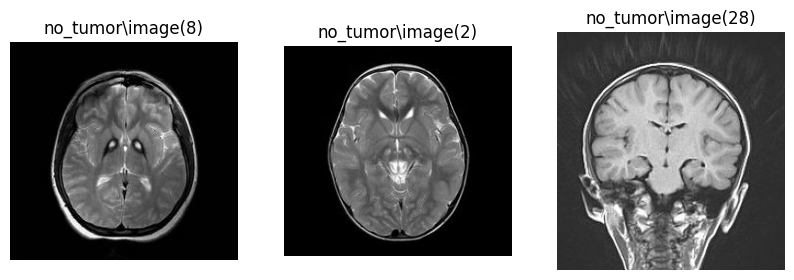

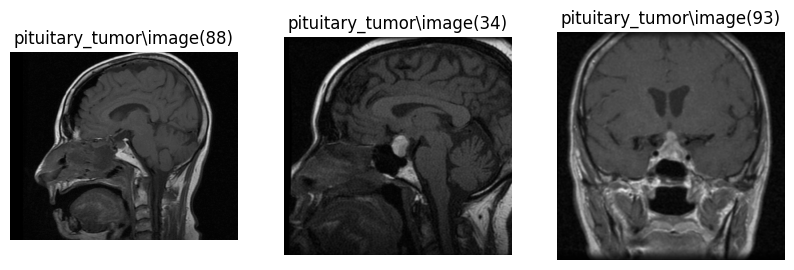

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# TODO rename images so I know which tumor, particularly test set?
# TODO am I sure my tumors and images match? - it appears so

# Function to display three random images from a directory
def display_random_images(directory):
    files = os.listdir(directory)
    random_images = random.sample(files, 3)

    

    # Plot the random images
    plt.figure(figsize=(10, 5))
    for i, image_file in enumerate(random_images, 1):
        image_path = os.path.join(directory, image_file)

        # get the directory index for clearer labels
        second_to_last_backslash_index = image_path.rfind('\\', 0, image_path.rfind('\\'))

        plt.subplot(1, 3, i)
        img = mpimg.imread(image_path)
        plt.imshow(img)

        # title of each image includes tumor type and image name, cut off .jpg
        plt.title(f"{image_path[second_to_last_backslash_index+1:-4]}")

        plt.axis("off")

    plt.show()

# Display train samples
print("train samples")
for i in range(len(train_dirs)):
    display_random_images(train_dirs[i])

# Display test samples
print("test samples")
for i in range(len(test_dirs)):
    display_random_images(test_dirs[i])